# Clustering genome 

1. Data Understanding and Cleaning
2. Data Preparation
3. Modelling

# Data Understanding

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
dat = pd.read_csv('genomics test dataset.csv')
dat.head()

,ind,Marker,Variation
0,ind1,Marker1001,AA
1,ind1,Marker1002,AA
2,ind1,Marker1005,AA
3,ind1,Marker1007,AA
4,ind1,Marker1010,AA


In [3]:
dat.shape

(38776146, 3)

In [4]:
#basic data checks
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38776146 entries, 0 to 38776145
Data columns (total 3 columns):
ind          object
Marker       object
Variation    object
dtypes: object(3)
memory usage: 887.5+ MB


In [5]:
#basic data cleaning checks
dat.isna().sum()

ind          0
Marker       0
Variation    0
dtype: int64

## Transforming data from column C into numeric format, formating data from string format to matrix format

### Dummy Variables
The variable `Variation ` has  levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [6]:
# Get the dummy variables for the feature 'Variation' and store it in a new variable - 'status'

status = pd.get_dummies(dat['Variation'])

# Check what the dataset 'status' looks like
status.head()

,AA,AB,AC,AD,AE,AF,AG,AH,AI,BB,...,FH,FI,FJ,GG,GH,HH,II,IJ,JJ,KK
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, you don't need 51 columns. You can drop any one  column, as Variation can be identified with just the last 50 columns

In [7]:
# droping the first column from status df using 'drop_first = True'
status = pd.get_dummies(dat['Variation'], drop_first = True)

# Add the results to the original housing dataframe
datm = pd.concat([dat, status], axis = 1)

#  head of our dataframe.
datm.head()

,ind,Marker,Variation,AB,AC,AD,AE,AF,AG,AH,...,FH,FI,FJ,GG,GH,HH,II,IJ,JJ,KK
0,ind1,Marker1001,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ind1,Marker1002,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ind1,Marker1005,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ind1,Marker1007,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ind1,Marker1010,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Converting marker categorical variable to numeric 
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
datm["Marker_code"] = lb_make.fit_transform(datm["Marker"])
datm.head(11)

,ind,Marker,Variation,AB,AC,AD,AE,AF,AG,AH,...,FI,FJ,GG,GH,HH,II,IJ,JJ,KK,Marker_code
0,ind1,Marker1001,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,ind1,Marker1002,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,ind1,Marker1005,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,ind1,Marker1007,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,ind1,Marker1010,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
5,ind1,Marker1013,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
6,ind1,Marker1296,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,314
7,ind1,Marker1369,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,394
8,ind1,Marker1878,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,926
9,ind1,Marker1883,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,931


In [9]:

datm["ind_code"] = lb_make.fit_transform(datm["ind"])
datm.head(11)

,ind,Marker,Variation,AB,AC,AD,AE,AF,AG,AH,...,FJ,GG,GH,HH,II,IJ,JJ,KK,Marker_code,ind_code
0,ind1,Marker1001,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,ind1,Marker1002,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2,ind1,Marker1005,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
3,ind1,Marker1007,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
4,ind1,Marker1010,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0
5,ind1,Marker1013,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,0
6,ind1,Marker1296,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,314,0
7,ind1,Marker1369,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,394,0
8,ind1,Marker1878,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,926,0
9,ind1,Marker1883,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,931,0


In [10]:
# generating sampled data set
datm = datm.sample(n = 80000 , replace="False") 
datm.shape

(80000, 55)

In [11]:
datm.columns

Index(['ind', 'Marker', 'Variation', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH',
       'AI', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BK', 'CC', 'CD',
       'CE', 'CF', 'CG', 'CH', 'CI', 'CK', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI',
       'DK', 'EE', 'EF', 'EG', 'EH', 'EI', 'EJ', 'FF', 'FG', 'FH', 'FI', 'FJ',
       'GG', 'GH', 'HH', 'II', 'IJ', 'JJ', 'KK', 'Marker_code', 'ind_code'],
      dtype='object')

## Clustering

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [12]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
#Let's check the Hopkins measure
 hopkins(datm.drop(['ind','Marker','Variation','Marker_code'],axis=1))

0.88 is a good Hopkins score. Hence the data is suitable for clustering. Preliminary check is now done.


In [14]:
dat3=datm.drop(['ind','Marker','Variation','Marker_code'],axis=1)

### K-means Clustering

In [15]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3)
    sse_.append([k, silhouette_score(dat3, kmeans.labels_)])

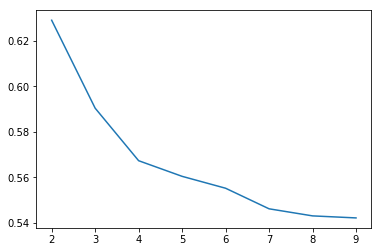

In [16]:

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

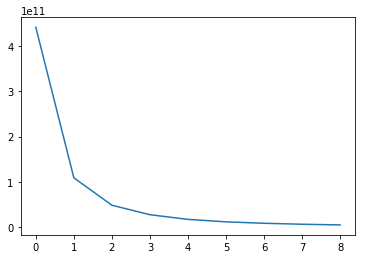

In [17]:

#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [18]:
#A distinct elbow is formed at around 2-3 clusters. Let's finally create the clusters and see for ourselves which ones fare better
#K-means with k=3 clusters
model_clus5 = KMeans(n_clusters = 6, max_iter=50)
model_clus5.fit(dat3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
dat4=datm
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['ind', 'Marker', 'Variation', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH',
       'AI', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BK', 'CC', 'CD',
       'CE', 'CF', 'CG', 'CH', 'CI', 'CK', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI',
       'DK', 'EE', 'EF', 'EG', 'EH', 'EI', 'EJ', 'FF', 'FG', 'FH', 'FI', 'FJ',
       'GG', 'GH', 'HH', 'II', 'IJ', 'JJ', 'KK', 'Marker_code','ind_code','ClusterID']
dat_km.head()

,ind,Marker,Variation,AB,AC,AD,AE,AF,AG,AH,...,GG,GH,HH,II,IJ,JJ,KK,Marker_code,ind_code,ClusterID
0,ind2008,Marker820,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4947,1063,3
1,ind2066,Marker2639,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1692,1127,3
2,ind6808,Marker4264,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3385,6393,2
3,ind5533,Marker4702,BB,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3844,4978,0
4,ind1443,Marker5018,AA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4181,450,3


In [20]:
dat_km['ClusterID'].value_counts()

1    13735
2    13493
3    13366
4    13263
5    13200
0    12943
Name: ClusterID, dtype: int64

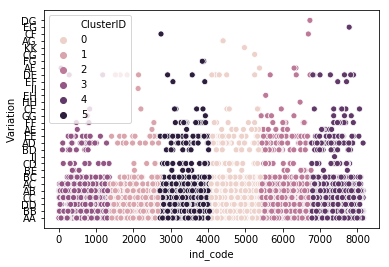

In [21]:
#Each cluster has a good number 
#Let's do some further visualizations.
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='ind_code',y='Variation',hue='ClusterID',legend='full',data=dat_km)

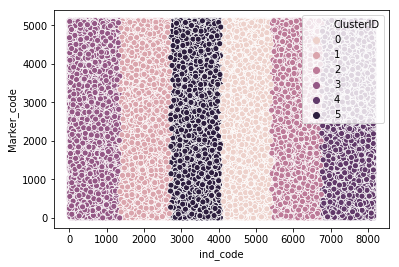

In [22]:
sns.scatterplot(x='ind_code',y='Marker_code',hue='ClusterID',legend='full',data=dat_km)

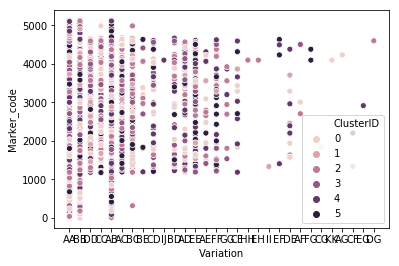

In [23]:
sns.scatterplot(x='Variation',y='Marker_code',hue='ClusterID',legend='full',data=dat_km)

C:\Users\91702\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


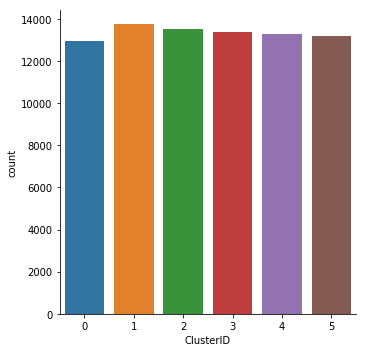

In [24]:
sns.factorplot(x ='ClusterID' ,data = dat_km, kind = "count")

In [25]:
#let's take a look at those features clusters and try to make sense if the clustering process worked well.
# features in cluster 0
cluster0=dat_km[dat_km['ClusterID']==0]
cluster0[['ind','Marker','Variation']].to_csv(r'cluster0.csv',index = None, header=True)

In [26]:
#unique variation in cluster 0
cluster0['Variation'].unique()

array(['BB', 'AA', 'AB', 'CC', 'AC', 'BE', 'DD', 'BC', 'AD', 'AE', 'EE',
       'FF', 'CD', 'CE', 'BD', 'CG', 'KK', 'DE', 'AG', 'AF'], dtype=object)

In [27]:
#unique ind in cluster 0
cluster0['ind'].unique()

array(['ind5533', 'ind5516', 'ind5700', ..., 'ind5172', 'ind5805',
       'ind54'], dtype=object)

In [28]:
# features in cluster 1
cluster1=dat_km[dat_km['ClusterID']==1]
cluster1[['ind','Marker','Variation']].to_csv(r'cluster1.csv',index = None, header=True)

In [29]:
#unique variation in cluster 1
cluster1['Variation'].unique()

array(['AA', 'BB', 'AB', 'AC', 'CC', 'DD', 'CD', 'EE', 'BC', 'AD', 'II',
       'AE', 'DE', 'BE', 'CE', 'FF'], dtype=object)

In [30]:
#unique ind in cluster 1
cluster1['ind'].unique()

array(['ind302', 'ind2412', 'ind2306', ..., 'ind23', 'ind2529', 'ind24'],
      dtype=object)

In [31]:
#features in cluster 2
cluster2=dat_km[dat_km['ClusterID']==2]
cluster2[['ind','Marker','Variation']].to_csv(r'cluster2.csv',index = None, header=True)

In [32]:
#unique variation in cluster 2
cluster2['Variation'].unique()

array(['AA', 'CC', 'AB', 'BB', 'BC', 'DD', 'AC', 'BD', 'BE', 'HH', 'EH',
       'EE', 'FF', 'AD', 'DE', 'AE', 'CD', 'AF', 'CE', 'GG', 'CF', 'DG'],
      dtype=object)

In [33]:
#unique ind in cluster 2
cluster2['ind'].unique()

array(['ind6808', 'ind5993', 'ind6782', ..., 'ind7057', 'ind6987',
       'ind6933'], dtype=object)

In [34]:
#features in cluster 3
cluster3=dat_km[dat_km['ClusterID']==3]
cluster3[['ind','Marker','Variation']].to_csv(r'cluster3.csv',index = None, header=True)

In [35]:
#unique variation in cluster 3
cluster3['Variation'].unique()

array(['AA', 'BB', 'DD', 'CC', 'AB', 'BD', 'BC', 'AC', 'AD', 'CD', 'DE',
       'EE', 'AF', 'BE', 'GG', 'FF', 'CE', 'AE'], dtype=object)

In [36]:
#unique ind in cluster 3
cluster3['ind'].unique()

array(['ind2008', 'ind2066', 'ind1443', ..., 'ind163', 'ind193', 'ind173'],
      dtype=object)

In [37]:
#features in cluster 4
cluster4=dat_km[dat_km['ClusterID']==4]
cluster4[['ind','Marker','Variation']].to_csv(r'cluster4.csv',index = None, header=True)

In [38]:
#unique variation in cluster 4
cluster4['Variation'].unique()

array(['DD', 'BB', 'AA', 'AB', 'CC', 'IJ', 'AC', 'EE', 'AD', 'CD', 'FF',
       'BC', 'GG', 'AE', 'BD', 'BE', 'CE', 'DE', 'EF', 'EG'], dtype=object)

In [39]:
#unique ind in cluster 4
cluster4['ind'].unique()

array(['ind7813', 'ind8033', 'ind7259', ..., 'ind8207', 'ind72',
       'ind8233'], dtype=object)

In [40]:
#features in cluster 5
cluster5=dat_km[dat_km['ClusterID']==5]
cluster5[['ind','Marker','Variation']].to_csv(r'cluster5.csv',index = None, header=True)

In [41]:
#unique variation in cluster 5
cluster5['Variation'].unique()

array(['BB', 'AA', 'AB', 'CC', 'CD', 'AC', 'DD', 'EE', 'FF', 'AD', 'CE',
       'BC', 'BE', 'BD', 'AE', 'EF', 'FG', 'DE', 'GG', 'CF'], dtype=object)

In [42]:
#unique ind in cluster 5
cluster5['ind'].unique()

array(['ind3828', 'ind4466', 'ind4117', ..., 'ind4112', 'ind3816',
       'ind44'], dtype=object)